# Data Science Blog Post Project 
## By Saad Alrazoq
Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.
    
if interested, the dataset can be found here: https://www.kaggle.com/stackoverflow/so-survey-2017
    
in this notebook I used the CRISP-DM Process, and it stands for cross industry process for data mining and it's like the following

Business Understanding, Data Understanding, Preparing The Data, Data Modeling, Evalute the results, Deploy.

## Business Understanding

I'm interested to find the following information, and to understand the data while answering them.

- 1.How many countries, and which top 10 countries had the most respondent?
- 2.What is the most programing lanuage is used? 
- 3.What Location Have The highest Salary?
- 4.A look To Saudi Arabia Data and insights

## Understand the data and importing the libraries

In [259]:
# importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 

In [260]:
# reading the data
df_public = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

In [261]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [496]:
df_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


In [263]:
df_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [264]:
df_public.shape

(51392, 154)

we can see that we have 154 columns, and 51392 respondes for the survey 

In [265]:
df_public.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


checking the columns names, and see what columns do we need 

## Preparing the data

In [266]:
for col_name in df_public:
    print(col_name)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [267]:
df_public['Country'].nunique()

201

we can see that we had a 201 different countries 

In [268]:
sorted(df_public['Country'].unique())

['Afghanistan',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaidjan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guyana',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibra

In [269]:
EU = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']
NA = ['Canada','United States']

ASIA = ['China','Iran','Turkey','Lebanon','Jordan','Iraq','Singapore','South Korea','Thailand','India',
        'Vietnam','Taiwan','Russia','Japan','Malaysia','Georgia','Saudi Arabia','Oman','Qatar','Kuwait','Bahrain','United Arab Emirates', 'Afghanistan'
      'Australia', ]
AFRICA = ['Sudan','Kenya','Morocco','Egypt','Sengal','South Africa','Algiria','Libya','Chad','Cameroon','Ghana','Tunisia']

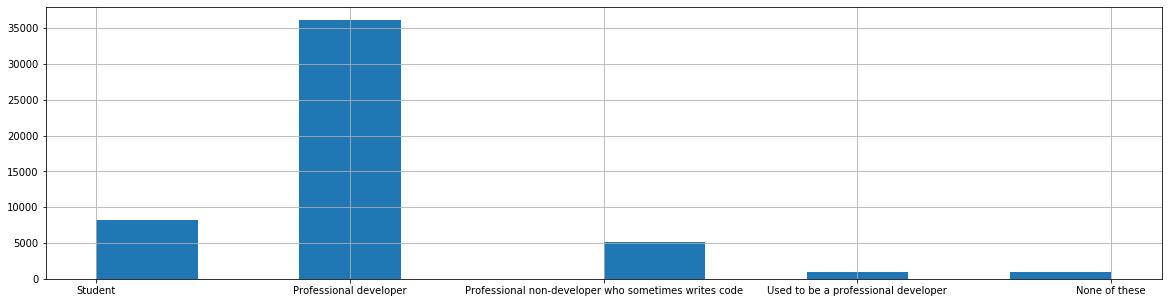

In [270]:
df_public['Professional'].hist(figsize=(20,5));

## 1.How many countries, and which top 10 countries had the most respondent?

Creating a copy of the dataset and we will work thorough it 

In [271]:
df1=df_public.copy()

In [272]:
#creating a location column so we can see the Continentes we have  
df1['Location'] = df1['Country'].apply(lambda x: 'EU' if x in EU
                                      else ('NA' if x in NA
                                      else 'ASIA' if x in ASIA
                                      else 'AFRICA' if x in AFRICA
                                      else 'Other'))

In [273]:
df1['Location'].value_counts()

EU        17418
NA        13688
Other     11712
ASIA       7764
AFRICA      810
Name: Location, dtype: int64

So we can see that it's clear most of the participants are from EU, but we want it in a chart to see it in a clear way

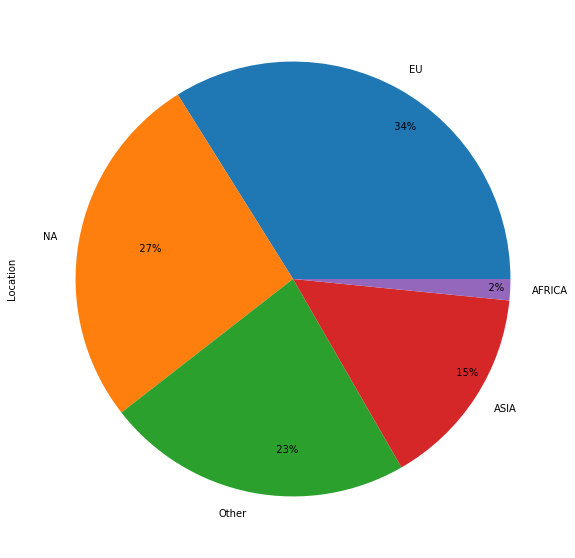

In [274]:
df1['Location'].value_counts(normalize=True).plot(kind='pie',figsize=(10,10), autopct='%20.0f%%',pctdistance=0.8);

- we can see from the pie chart that EU has the most responders with 34% percentage after it, comes NA with 27% 

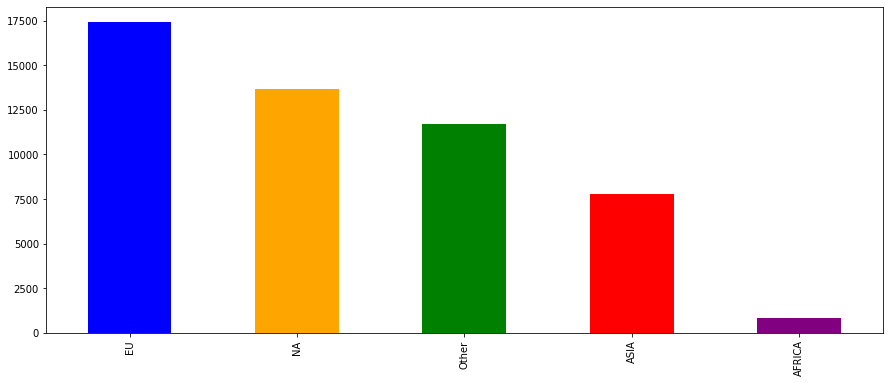

In [424]:
df1['Location'].value_counts().plot(kind="bar",color=['Blue','Orange','Green','Red','Purple'],figsize=(15,6));

Text(0.5, 1.0, 'Responders Location')

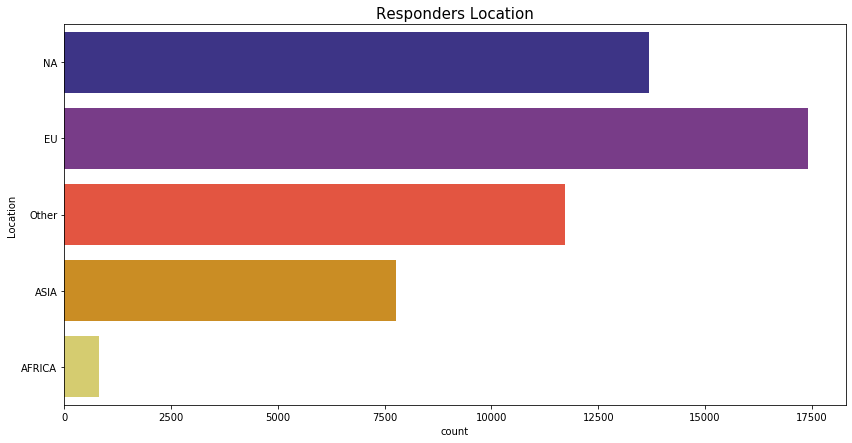

In [656]:
plt.figure(figsize=(14,7))
sb.countplot(data=df1, y='Location',palette='CMRmap');
plt.title('Responders Location', size=15)

In [671]:
df1['Country'].value_counts(normalize=True)

United States                     0.222895
India                             0.101125
United Kingdom                    0.085519
Germany                           0.080616
Canada                            0.043450
                                    ...   
Seychelles                        0.000019
Guam                              0.000019
Heard and McDonald Islands        0.000019
British Indian Ocean Territory    0.000019
Vatican City State                0.000019
Name: Country, Length: 201, dtype: float64

In [663]:
top10 = df1['Country'].value_counts()

In [664]:
top10.head(10)

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Name: Country, dtype: int64

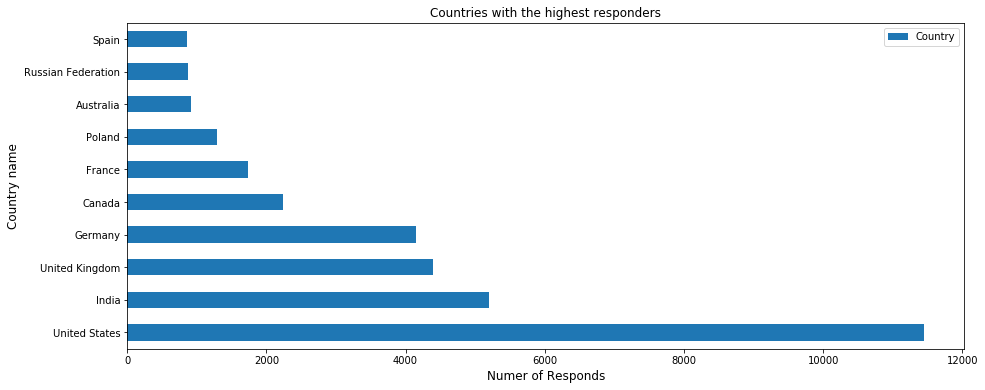

In [666]:
plt.figure(figsize=(15,6))
top10.head(10).plot(kind='barh')
plt.legend(['Country'])
plt.xlabel('Numer of Responds', size= 12)
plt.ylabel('Country name', size = 12);
plt.title('Countries with the highest responders');

so we found the top10 countries for the resonders, and it shows that US has the highest responders with 11,455 responds, where in second comes india with 5197 respnds 

## 2. What is the most programing lanuage is used?

In [674]:
df_lang= df1['HaveWorkedLanguage'].value_counts().reset_index()

In [675]:
df_lang.rename(columns={'index':'Languages','HaveWorkedLanguage':'Count'}, inplace=True)

In [676]:
#used this cell to look through the data set and what kind of languages do we have
df_lang.tail(1)

,Languages,Count
8437,C++; C#; Python; SQL; VB.NET; VBA,1


creating a new variable for the possible values 

In [677]:
p_lang=['C#','JavaScript','SQL','PHP','Java','Lua','Python','C','R','Ruby','TypeScript'
       'C++','Swift','Objective-C','HTML','Rust','VBA','Matlab','Elixir','Go','Scala'
       'Assembly','Dart','CoffeeScript','F#','Groovy','VB.NET']

In [678]:
## note this function I took from udacity classroom

def total_count(df1, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df1.shape[0]):
            #if the ed type is in the row, add the devs
            if val in df1[col1][idx]:
                new_df[val] += int(df1[col2][idx])
    #clean up the resulting dataframe8
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('Count', ascending=False, inplace=True)
    return new_df

In [686]:
Most_Used_Langs = total_count(df_lang,'Languages','Count',p_lang)
Most_Used_Langs.head(10)

,Languages,Count
4,Java,28149
1,JavaScript,22875
7,C,21173
2,SQL,18754
0,C#,12476
6,Python,11704
3,PHP,10290
8,R,5051
9,Ruby,3324
10,Swift,2368


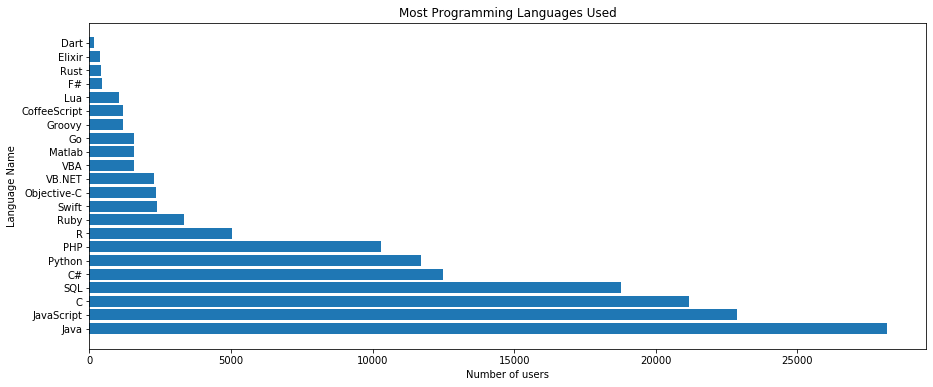

In [680]:
plt.figure(figsize=(15,6))
plt.barh(Most_Used_Langs['Languages'],Most_Used_Langs['Count'])
plt.title('Most Programming Languages Used')
plt.xlabel('Number of users')
plt.ylabel('Language Name');

to answer the 2nd question, we see that jave and javascript have the most users, where jave have 28,149 users and javascript 22,875 users

## 3. What Location Have The highest Salary 

in this section I'm gonna be foucsing on the salaries so I'm gonna drop all the NAN values and make the data for salaries

In [501]:
df3= df1.dropna(subset=['Salary'])

we can notice that the salary column don't have any missing values anymore so we can now work through it, also we can see al what we have in the dataset are Professional developers, which make sense 

In [528]:
df3['Professional'].value_counts()

Professional developer    12891
Name: Professional, dtype: int64

In [503]:
df3.isna().sum()

Respondent                0
Professional              0
ProgramHobby              0
Country                   0
University                0
                      ...  
QuestionsConfusing     1326
InterestedAnswers      1293
Salary                    0
ExpectedSalary        12891
Location                  0
Length: 155, dtype: int64

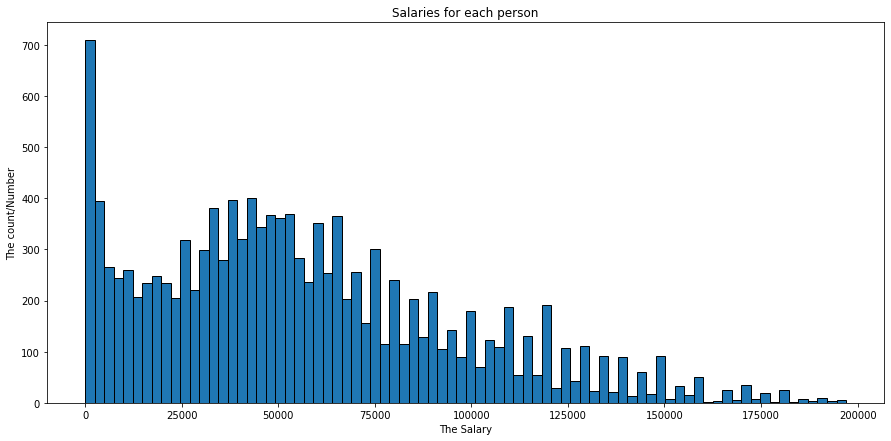

In [521]:
plt.figure(figsize=(15,7))
plt.hist(df3['Salary'], bins= 80, edgecolor='black');
plt.title('Salaries for each person')
plt.xlabel('The Salary')
plt.ylabel('The count/Number')
plt.show()

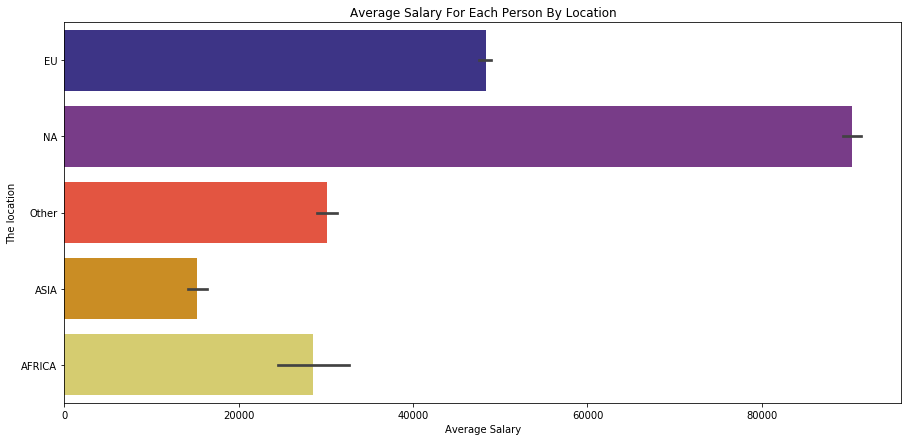

In [555]:
plt.figure(figsize=(15,7))
sb.barplot(data=df3,x='Salary', y='Location',palette= 'CMRmap')
plt.title('Average Salary For Each Person By Location')
plt.xlabel('Average Salary')
plt.ylabel('The location')
plt.show()

from the preivous chart we can see that North America has the highest average for the annual salary with a big difference from the 2nd, which is EU

In [565]:
df3.groupby(['Location'])['Salary'].mean().reset_index()

,Location,Salary
0,AFRICA,28486.603710
1,ASIA,15215.499765
2,EU,48323.125063
3,NA,90306.040645
4,Other,30120.845576


we can see the table and it gives more insights for the salaries, we can see NA with 90,306 as an annual salary 

### Extra insights, Since I'm from Saudi Arabia I wanted to check some insights from Saudi Arabia

In [567]:
Saudi_df = df1[df1['Country']== 'Saudi Arabia']

In [571]:
Saudi_df.shape

(52, 155)

we have only 52 responders from Saudi Arabia 

In [570]:
Saudi_df.head(1)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Location
888,889,Professional developer,"Yes, both",Saudi Arabia,No,Employed full-time,Bachelor's degree,"Information technology, networking, or system ...",Never,"10,000 or more employees",...,Male,No education,Middle Eastern,Strongly agree,Somewhat agree,Disagree,Strongly agree,22400.0,NaN,ASIA


In [616]:
Saudi_df['EmploymentStatus'].value_counts()

Employed full-time                                      35
Not employed, and not looking for work                   6
Independent contractor, freelancer, or self-employed     5
Employed part-time                                       3
I prefer not to say                                      2
Not employed, but looking for work                       1
Name: EmploymentStatus, dtype: int64

- Checking the EmploymentStatus for the responders from Saudi Arabia

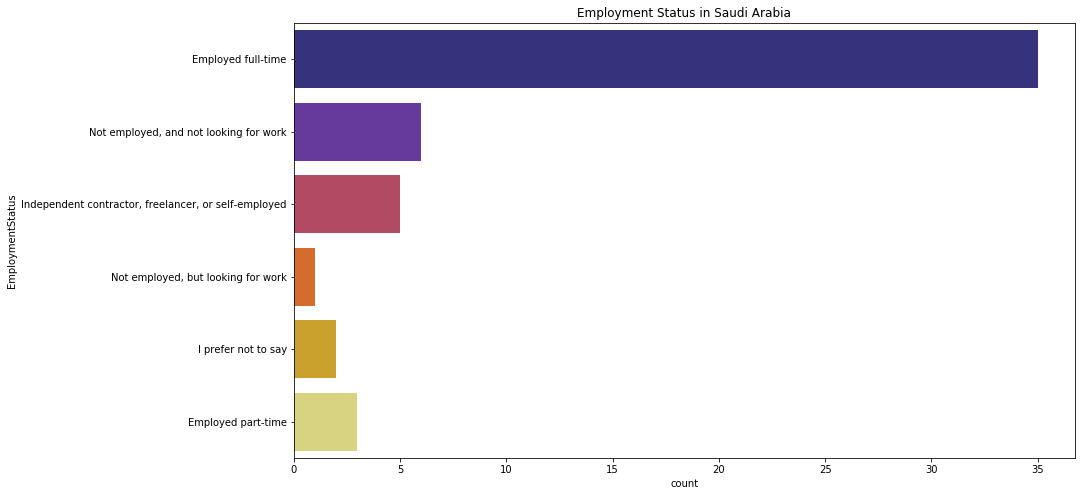

In [650]:
plt.figure(figsize=(14,8))
sb.countplot(data=Saudi_df, y='EmploymentStatus',palette='CMRmap');
plt.title("Employment Status in Saudi Arabia")
plt.show()

In [582]:
Saudi_df['EmploymentStatus'].value_counts(normalize=True)

Employed full-time                                      0.673077
Not employed, and not looking for work                  0.115385
Independent contractor, freelancer, or self-employed    0.096154
Employed part-time                                      0.057692
I prefer not to say                                     0.038462
Not employed, but looking for work                      0.019231
Name: EmploymentStatus, dtype: float64

So from the 52 responders, 35 of them are employed full time and it's 67.3% of the 52, and 6 people are looking for a job, and 5 of them are freelancer or self-employed, 3 part time

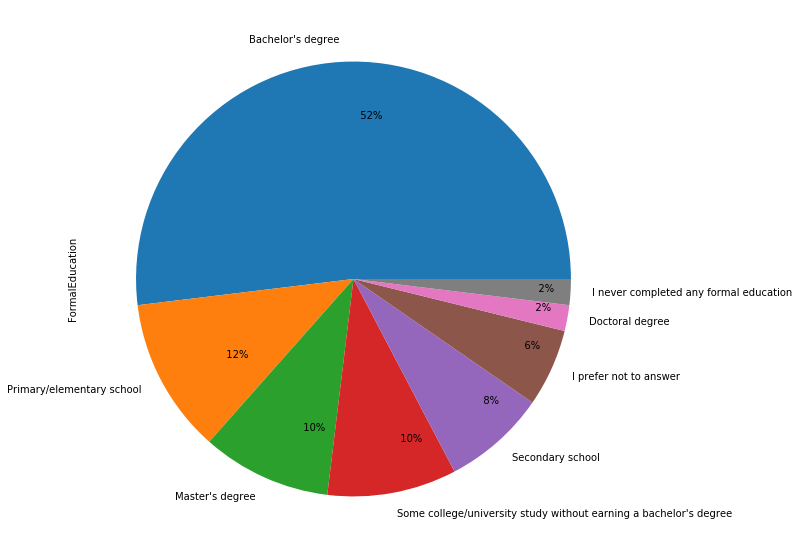

In [593]:
Saudi_df['FormalEducation'].value_counts().plot(kind='pie',figsize=(10,10),autopct='%20.0f%%',pctdistance=0.75);

In [687]:
Saudi_df['FormalEducation'].value_counts()

Bachelor's degree                                                    27
Primary/elementary school                                             6
Master's degree                                                       5
Some college/university study without earning a bachelor's degree     5
Secondary school                                                      4
I prefer not to answer                                                3
Doctoral degree                                                       1
I never completed any formal education                                1
Name: FormalEducation, dtype: int64

the difference is obvious between Bachelor's degree and the other degrees, where 52% of the responders have a bachelor degree and interestingly we can see elementary school is 12% and it comes second

##  Conclusions 

After we finished analyzing and taking a look around the datasets, and we answered our questions and we found some insights regarding Saudi Arabia, we can conclude the following: 

#### - 1.How many countries, and which top 10 countries had the most respondent?
we have 201 countriesn and the top 10 are: US, india, UK, Germany, Canada, France, Poland, Australia, Russian Federation, Lastly Spain

also we found that EU had the most responders in general 

#### - 2.What is the most programing lanuage is used?

From our analysis we found Java was the most programming language is used with 28,149 users, after that comes javascript with 22,875 users 

#### - 3.What Location Have The highest average of Salary?

using the location column and seaborn to find the average, and we saw that North America had the highest average of annual salary where it was 90,306 a year

#### - 4.A look To Saudi Arabia Data and insights

Lastly I checked Saudi Arabia responders, and we had 52 responders and 35 of them are full time employed and the rest of the are Part employed or not employed, and some of them didn't prefer to say 

also I checked the Education of the responders from Saudi Arabia, we saw that 52% of the responders have a bachelor's degree, and interstingly we saw 12% of the responders had elementry school degree.